In [ ]:
#|default_exp moseley_law

# Moseley's law 

> From peak energies to the Periodic Table 

## From peak energies to the Periodic Table 

::: {#fig} 

![](https://upload.wikimedia.org/wikipedia/en/d/dd/Henry_Moseley.jpg)


Henry Moseley (image: wikipedia)
:::

As we have seen in the previous section an X-Ray Fluorescence spectrum for a specific chemical element contains a characteristic combination of sharp peaks of different heights at different energies. These discrete peaks are a direct evidence of the quantum mechanics of electrons jumping from one discrete energy level to another. In 1913-1914 the young British physicist [Henry Moseley](https://en.wikipedia.org/wiki/Moseley%27s_law) discovered a beautiful simple regular pattern that relates the energy of the (typically) strongest peak in a pure element spectrum (called the $K_{\alpha}$ line) to the atomic number ($Z$). 

$$ E_{K_{\alpha}} = 10.2 \left( Z - 1 \right)^2 $$

Where the energy is expressed in units of electron volt $[eV]$. Suppose now that you observe a large peak in a spectrum at a given energy but it is unknown which element generated. It is useful now to invert this expression to calculate the atomic number of the prime suspect chemical element that possibly emitted the peak. 

$$ Z = \sqrt{\frac{E_{K_{\alpha}}}{10.2}} + 1 $$

Note that that we have simple a square root function here. As a practical numerical example, suppose now we measure an XRF spectrum for a sample of a pure (for the sake of this exercise) unknown element (See figure x). The largest peak in this spectrum has an energy of 6.40 keV = 6400 eV. Rounding off one can calculate

$$ Z = \sqrt{\frac{6400}{10.2}} + 1 = 26.05 \approx 26 \rightarrow \rm{Fe} $$
 
In the periodic table it is found that this atomic number corresponds to iron (Fe), which indeed is the element used for the measurement. Let's create a plot with peak patterns for all regular elements from sodium (Na) up to tin (Sn) to see if we can confirm Moseley's law.  

In [ ]:
from moseley import PeriodicTable, PeakPatternAtlas, moseley_law 
import numpy as np 

In [ ]:
table = PeriodicTable()
H_to_Sn = list(table.ptable_regular['symbol'])[10:50]
ppa = PeakPatternAtlas(EOI=H_to_Sn, excitation_energy_keV=40)

Ready building Peak Pattern Atlas!                                                                   


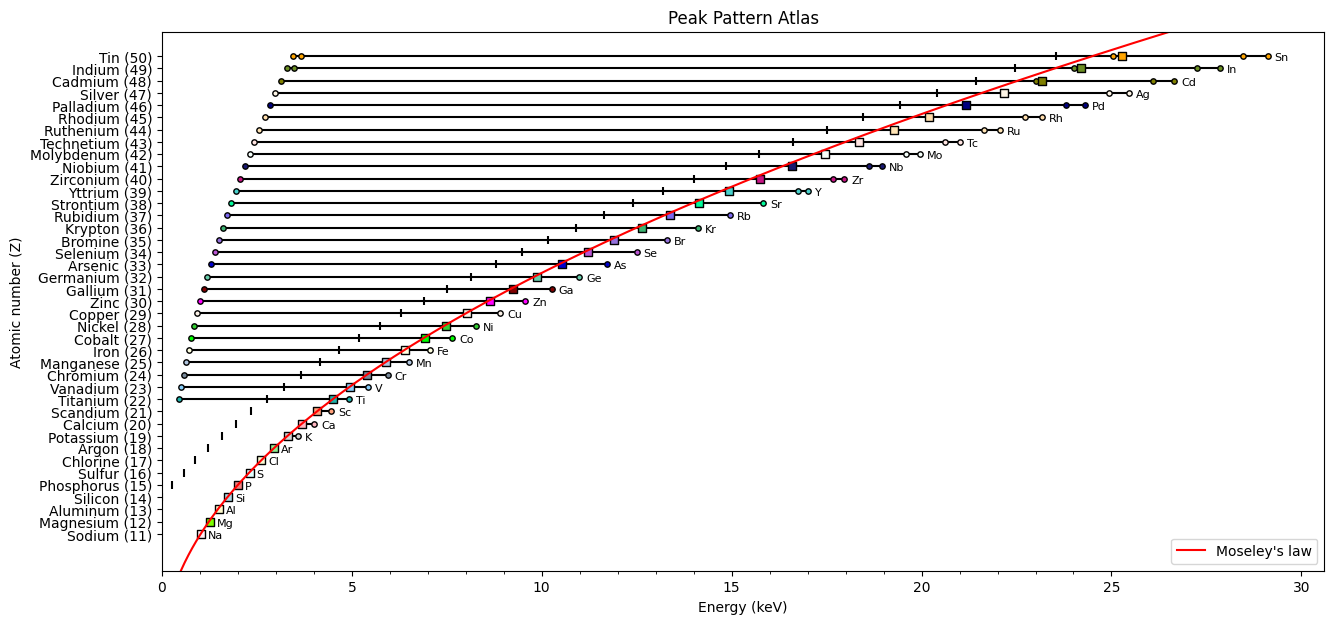

In [ ]:
x = np.arange(0, 30, 0.1)
y = moseley_law(x)

ax = ppa.plot_atlas(moseley=True)
ax.plot(x, y, color='r', label='Moseley\'s law')

ax.set_ylim([8, 52])
ax.set_ylabel('Atomic number (Z)') 
ax.legend(loc='lower right');

Physics can (sometimes) be simple and beautiful. Thank you, Henry Moseley!

## Functions  

In [ ]:
#|export 

import numpy as np 

In [ ]:
#|export 

def moseley_law(E_K_alpha_keV): 
    '''Square root form of Moseley's law. 
    
    Args: 
        E_K_alfa_keV (float or array of floats): K_alpha peak energy in keV 
        
    Example: 
        moseley_law(6.40)
        
    Returns: 
        Z (float or array of floats): predicted atomic number 
        
    ''' 
    Z = 1 + np.sqrt(1000 * E_K_alpha_keV / 10.2) 
    
    return Z 